In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
data.shape

(2224, 11)

In [5]:
data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [6]:
data.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [7]:
data.isnull().sum().sort_values(ascending=False)

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [8]:
data.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [9]:
data["date full"]=data["Date_month_year"]+' '+data["Time"]

In [10]:
data["date full"]=pd.to_datetime(data["date full"])
data["Date_month_year"]=pd.to_datetime(data["Date_month_year"])

In [11]:
data_monthly=data.set_index(data["date full"])

<AxesSubplot:xlabel='date full', ylabel='number of complaints'>

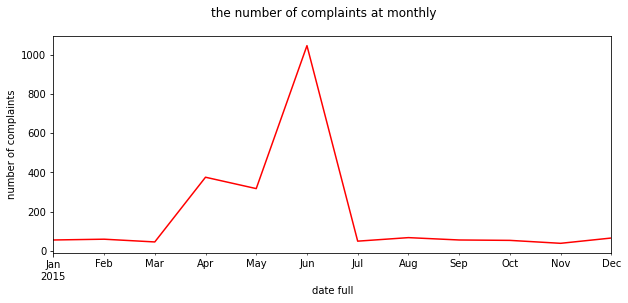

In [12]:
plt.figure(figsize=(10,4))
plt.suptitle("the number of complaints at monthly")
plt.ylabel("number of complaints")
data_monthly.groupby(pd.Grouper(freq="M")).size().plot(color='red')

<AxesSubplot:xlabel='day', ylabel='number of complaints'>

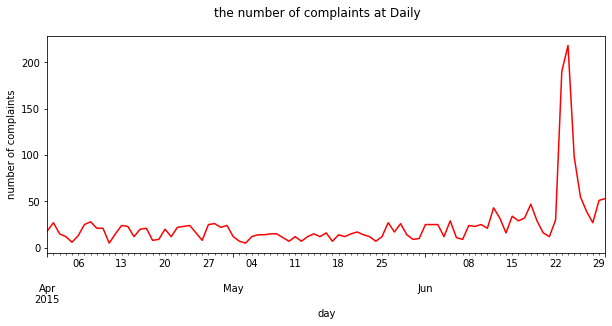

In [13]:
data["day"]=pd.to_datetime(data["Date"])
data_daily=data.set_index(data["day"])
plt.figure(figsize=(10,4))
plt.suptitle("the number of complaints at Daily")
plt.ylabel("number of complaints")
data_daily.groupby(pd.Grouper(freq="D")).size().plot(color='red')

In [14]:
data_of_comp_type=data["Customer Complaint"].value_counts()

In [15]:
data_of_comp_type.head(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Data Caps           11
Comcast Billing             11
Data Caps                   11
Unfair Billing Practices     9
Internet speed               8
Comcast data cap             8
Name: Customer Complaint, dtype: int64

In [21]:
data_of_comp_type.values.argmax()

0

In [18]:
data_of_comp_type1=data["Customer Complaint"].str.upper().value_counts()

In [76]:
data_of_comp_type1.values.argmax()

0

In [75]:
data_of_comp_type1.index[0]

'COMCAST'

In [78]:
data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [81]:
data["new_status"]=["Open" if Status=="Open" or Status=="Pending"
                   else "Close" for Status in data["Status"]]

In [83]:
data["new_status"].unique()

array(['Close', 'Open'], dtype=object)

In [84]:
status_state=pd.crosstab(data.State,data.new_status)

In [85]:
status_state

new_status,Close,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<AxesSubplot:title={'center':'state wise status of complaints'}, xlabel='State'>

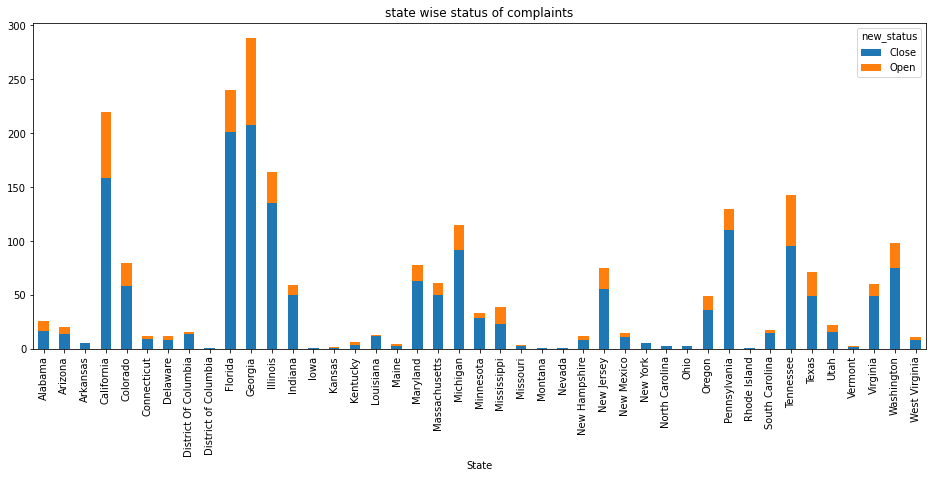

In [90]:
pd.crosstab(data.State,data.new_status).plot(kind="bar",figsize=(16,6),stacked=True,
                                             title="state wise status of complaints")

In [92]:
unsolved_comp=data[data["new_status"]=="Open"]

In [95]:
unsolved_comp_count=unsolved_comp.State.value_counts()

In [96]:
unsolved_comp_count

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Washington              23
Michigan                23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Virginia                11
Massachusetts           11
Alabama                  9
Indiana                  9
Utah                     6
Arizona                  6
New Mexico               4
Delaware                 4
Minnesota                4
New Hampshire            4
South Carolina           3
Kentucky                 3
Connecticut              3
West Virginia            3
District Of Columbia     2
Maine                    2
Kansas                   1
Missouri                 1
Vermont                  1
Louisiana                1
Name: State, dtype: int64

In [97]:
type(unsolved_comp_count)

pandas.core.series.Series

In [99]:
print(unsolved_comp_count.index[unsolved_comp_count.argmax()])

Georgia


<AxesSubplot:title={'center':'Highest percentage of unresolved complaints'}>

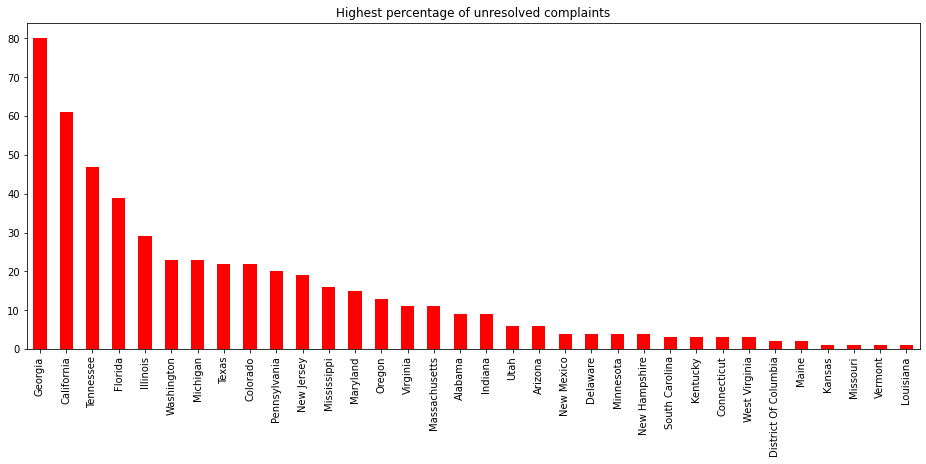

In [101]:
unsolved_comp_count.plot(kind="bar",figsize=(16,6),color="red",title="Highest percentage of unresolved complaints")

In [103]:
data["Received Via"].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [106]:
resolved=data.new_status.value_counts()

In [107]:
resolved

Close    1707
Open      517
Name: new_status, dtype: int64

<AxesSubplot:title={'center':'Complaints Status by the Internet and Customer Care Calls'}, ylabel='new_status'>

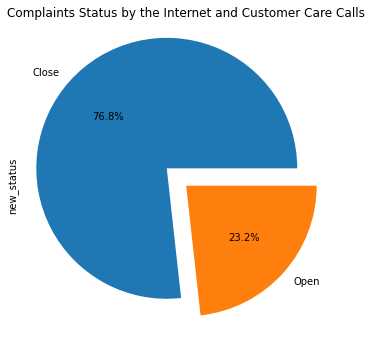

In [110]:
resolved.plot(kind="pie",explode = (0.2,0),autopct='%1.1f%%',
                        figsize = (14,6),title="Complaints Status by the Internet and Customer Care Calls")